# Content
- Problem Statement
  - Data Description
- Logistic Regression Intuition
  - Approach
  - Hyperplanes
  - Thresholding
  - Code implementation of sigmoid function  
  - Why is logistic regression the name if we are actually doing classification
- compare $y_i$ vs $\hat{y_i}$ ?
  - log loss intution
  - How we combine both cases into one equation
  - Implement log loss
- Optimization
  - Regularisation
  - Performance - Accuracy Metric
- Scikit Learn Implementation of Logistic Regression
    - EDA
    - Train test Split
    - Regularization implimentation
    - predic_proba function from sklearn
    - sklearn pipeline
- Impact of outliers
- Multiclass classification
- Log odds and Logit
- Classification metrics Problem statement intro
- Confusion matrix
- Why accuracy is not a good metric always

---
# Problem Statement
---

- **Telecom Churn Analysis**(loss of customers to competition) is a problem for telecom companies because it is expensive to acquire a new customer and companies want to **retain** their **existing customers**.
- Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. **Existing customers** will often have a **higher volume of service consumption** and can generate additional customer referrals.


  <center><img src="https://drive.google.com/uc?id=1QxWuFOSbyFRo3HZY27G_z8khCp8SFw5o" width="900" height="500"> </center>


## Business Objective

- **Customer retention** can be achieved with good customer service and products. But the **most effective way** for a company to prevent attrition of customers is to **truly know them**. The vast volumes of data collected about customers can be used to build churn prediction models.

- Knowing who is most **likely to defect** means that a company can **priorities focused marketing efforts** on that subset of their customer base.

- You being a **Data Analyst** has to come up with Machine Learning Algorithms to **predict and automate** the process of churn prediction.

## Data Description
<center>

| Records | Features |
| :-- | :-- |
| 5700 | 21 |


| Id | Features | Description |
| :-- | :--| :--|
|01| **state** | 2-letter code of the US state of customer residence|
|02| **account_length** | Number of months the customer has been with the current telco provider |
|03|**area_code**|string="area_code_AAA" where AAA = 3 digit area code|
|04|**intl_plan**|The customer has international plan|
|05|**vmail_plan**| The customer has voice mail plan|
|06|**vmail_messages**|Number of voice-mail messages|
|07|**day_mins**|Total minutes of day calls|
|08|**day_calls**|Total no of day calls|
|09|**day_charge**|Total charge of day calls|
|10|**eve_mins**|Total minutes of evening calls|
|11|**eve_calls**|Total no of evening calls|
|12|**eve_charge**|Total charge of evening calls|
|13|**night_mins**|Total minutes of night calls|
|14|**night_calls**|Total no of night calls|
|15|**night_charge**|Total charge of night calls|
|16|**intl_mins**|Total minutes of international calls|
|17|**intl_calls**|Total no of international calls|
|18|**intl_charge**|Total charge of international calls|
|19|**customer_service_calls**|Number of calls to customer service|
|20|**phone**|10 digit number|
|21|**churn**|Customer churn - target variable|

In [1]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Run the below line to install a lower version if gdown throws any error
#pip install gdown==4.6.0

#OR

#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m' -O churn_logistic.csv

In [3]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 116MB/s]


In [4]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Intl Plan  VMail Plan  Day Calls  ...  Eve Calls  \
0               1          0           1        110  ...         99   
1               1          0           1        123  ...        103   
2               0          0           0        114  ...        110   
3               2          1           0         71  ...         88   
4               3          1           0        113  ...        122   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70     KS   
1       16.62          103         11.45           3         3.70     OH   
2       10.30          104          7.32           5         3.29     NJ   
3        5.26           89          8.86           7         1.78     OH   
4       12.61          121          8.41           3         2.73     OK   

  Area Code     Phone Churn  
0       415  382-4657     0  
1       415  371-7191     0  
2       415  358-1921     0  
3       408  375-9999     0  
4       415  330-6626     0  

[5 rows x 21 columns]

## Logistic Regression Intuition

**Left Side**
- We know that in linear regression we try to fit a line or a plane to most of the points and then using the line predict values for future values.
- We have Linear Regression plot which we know when we predicted **price of car** using its **age**.
- This plot looks like a good fit,right?

**Right side**
- Now the **problem** has changed, you want to identify the classes
- We have data points for two classes, class1 and class2
  - Here class 1 or dot means churned and class 2 or cross means not churned.

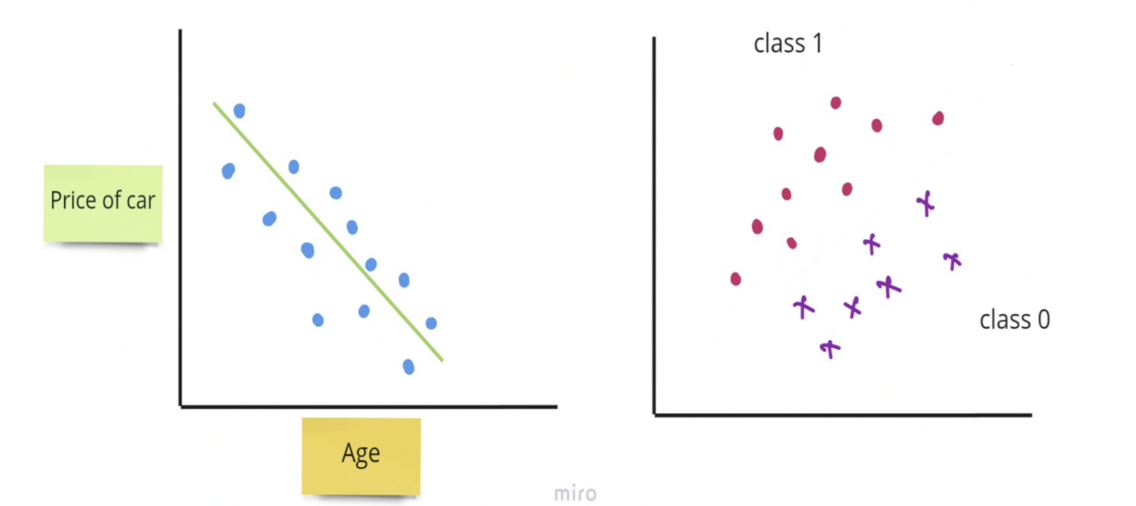

- We have data points from two classes
- Now when we get some new data points we want to identify
- what will be the class for two new points marked in green and yellow, what can we do?


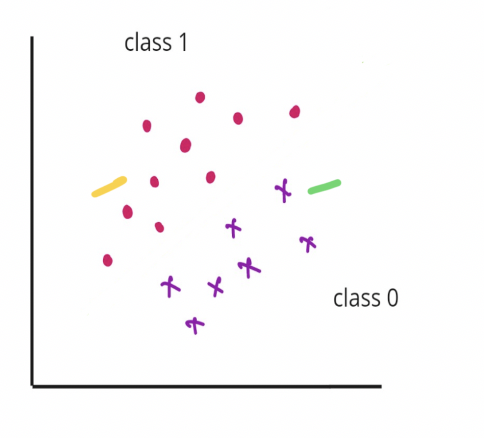

#### Approach
- Observe the target variable two different classes
- Instant click that we should have, it is a case of **classification**.
- The simplest approach we would take is to create a line to separate datapoints between these two classes.
- the point that falls to this side of the line will be class 0 and which falls to the other side will be class 1

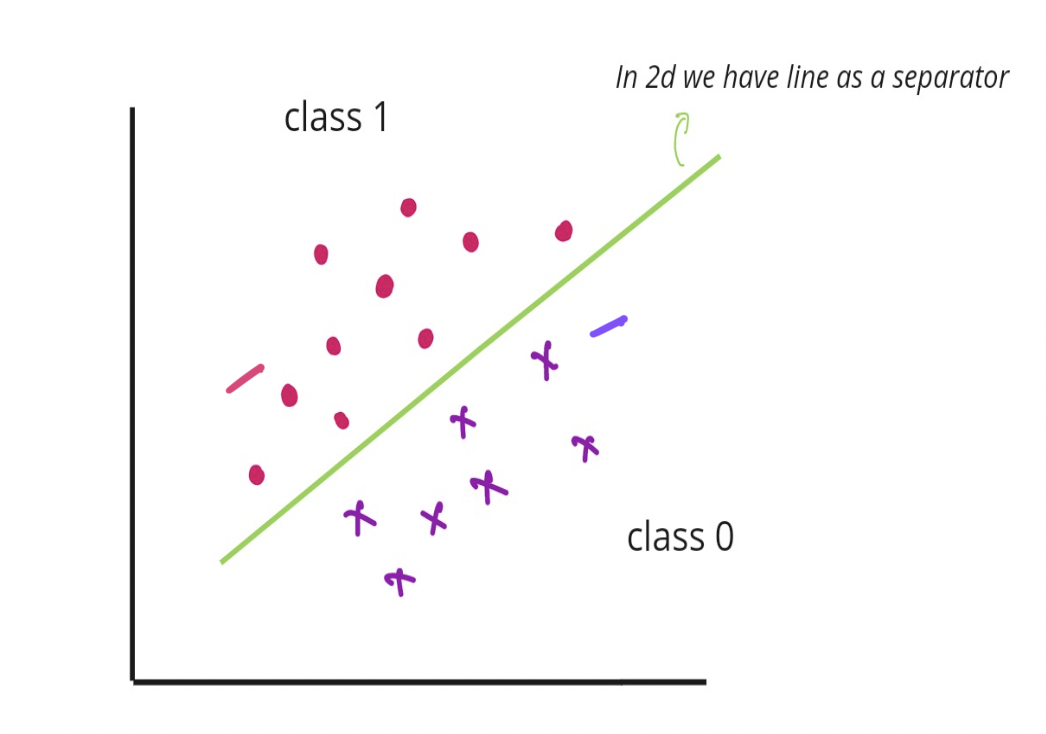


- What we want now is the line that separates our class 1 points from class 0 points.

- The idea here is that we want a line or a plane such that points are on the either side of line/plane.

- we can get that hyperplane as $ z= w_0 + w_1x_1 + w_2x_2 + ....... +w_dx_d $


  <center><img src="https://drive.google.com/uc?id=1EsD_N1XSR8Plze05K3bufoU5aGWjLVTj" width="400" height="300"> </center>

- You could also check plane how it separates in 3D.
                                     


### **Hyperplanes**

- hyperplane is an n-dimensional generalization of a plane
, an affine subspace of dimension ''n-1'' that splits an ''n dimensional space''

- For example, if you take the 3D space then hyperplane is a geometric entity that is 1 dimension less tha 3. So it’s going to be 2 dimensions and a 2-dimensional entity in a 3D space would be a plane. Now if you take 2 dimensions, then 1 dimension less would be a single-dimensional geometric entity, which would be a line and so on.

- So hyperplanes can be considered as a general entity, which based on the number of dimension can be line or plane or in case of more dimensions, just called hyperplane

----------------------------------------------------------------------------------------

  <center><img src="https://drive.google.com/uc?id=1gnxpYZ7M6IBKh3e1Izo8MjtUlO-ImeEo" width="600" height="450"> </center>


- now if we consider that line or plane as the seprator, what points do you think will be more probable of being in class 1?
- definately the points that are more away from the line are more more probable of being in that class
- so from the figure out of d1, d2, d3 which points are most probable to be in class 1
- more the points are distanced from the line or the plane of seperator, more sure we are of the class they are in
- so we can say that the more the distance from the seprator more the probability of it being in a class



We can use this plane or line or hyperplane as a separator for the two classes

- but can we use our linear function for getting the predictions ?
- note that the yi or the true values are {0,1} and what our linear function will give us will lie between {-∞ to +∞}
- the distances will be in the range of {-∞ to +∞}

We can apply some filter/function to our linear function so that our output lies between 0-1

- we will use a sigmoid function to transform the values from our linear function that has its range from {-∞ to +∞} to 0-1

- sigmoid function is also called logistic function

**Quiz**

```
The farther a point is from the line or hyperplane, the lower the chances that it belongs to a specific class.
A) True
B) False

Correct Answer: B) False.

Explanation: The farther a point is from the line or hyperplane, the higher the chances that it belongs to a specific class.
```

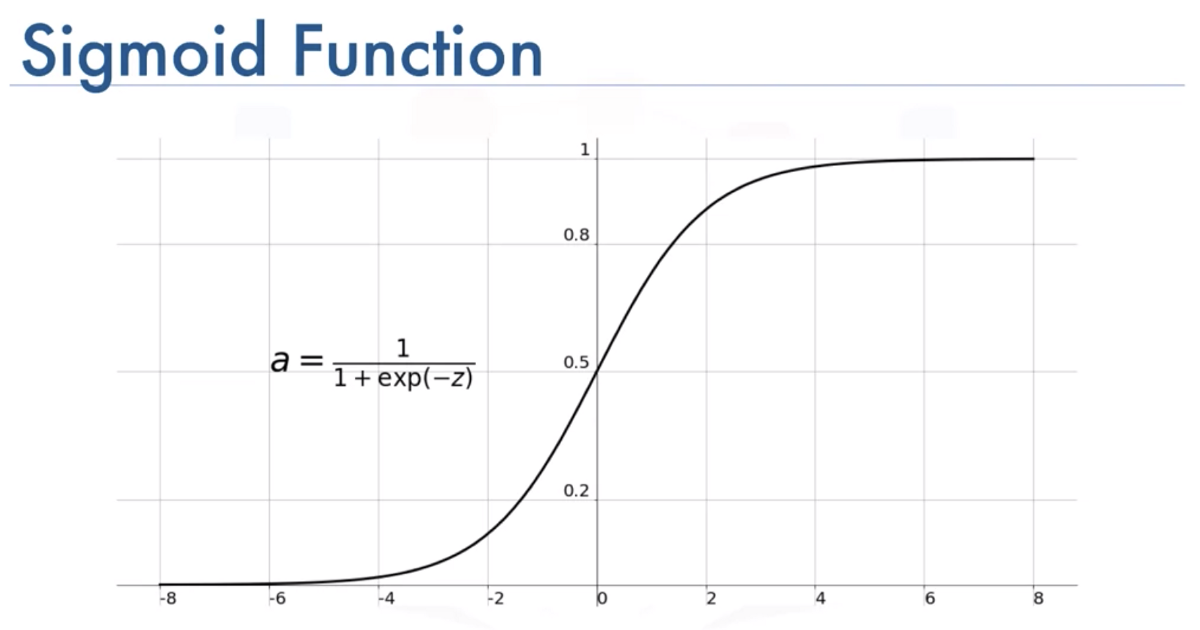

> **<font color='red'>INSTRUCTOR NOTES</font> optional**

Any non linear function can be used that squishes the range to 0-1, but this is the best for our case.

we can use step function, it will have value 0,1 but it wont be diffrentiable

Now what we are doing is taking the input from our z, ie: $ z= w_0 + w_1x_1 + w_2x_2 + ....... +w_dx_d $, and passing it to the sigmoid or logistic function, so that we get a value between 0,1.

so we can say that our sigmoid function will take up the values between  -∞ to +∞ and tranform it to 0-1

- The sigmoid function is probabilistic in nature, that is the values that it gives are between 0 and 1 can be considered as probabilities between 0 and 1 or 0 and 100 of belonging to class 1

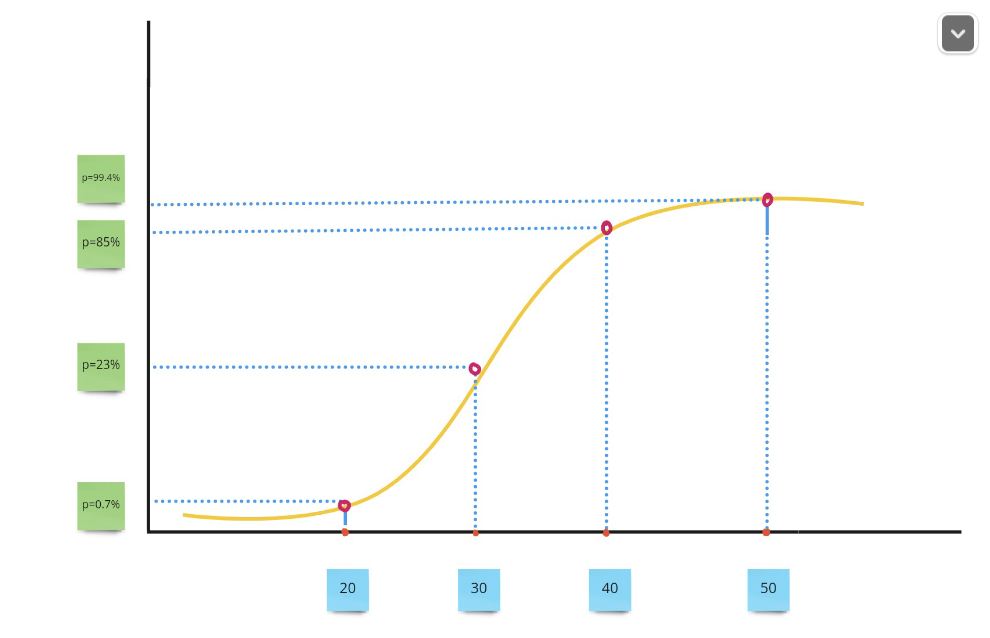

- if the sigmoid gives output of 0.7, we can say that it has 70% probability of being in class 1
- if the value is 0.2, we can say that it has 20% probability of being in class 1
- if it has 20% probability of being in class 1 then it means it has 80% probability of being in class 0
- this is how we assign the classes to the output

### Thresholding

we know that are $ y_i $(Actual labels) is 0 or 1, not between 0 and 1. it is exactly 0 or 1

but what we have ie $\hat{y_i}$ the predcited value is a value between 0 and 1 .

- it may be 0.7 or 0.2 or 0.34
- so what we do is set a threshold, above which we consider one class below which we consider another class

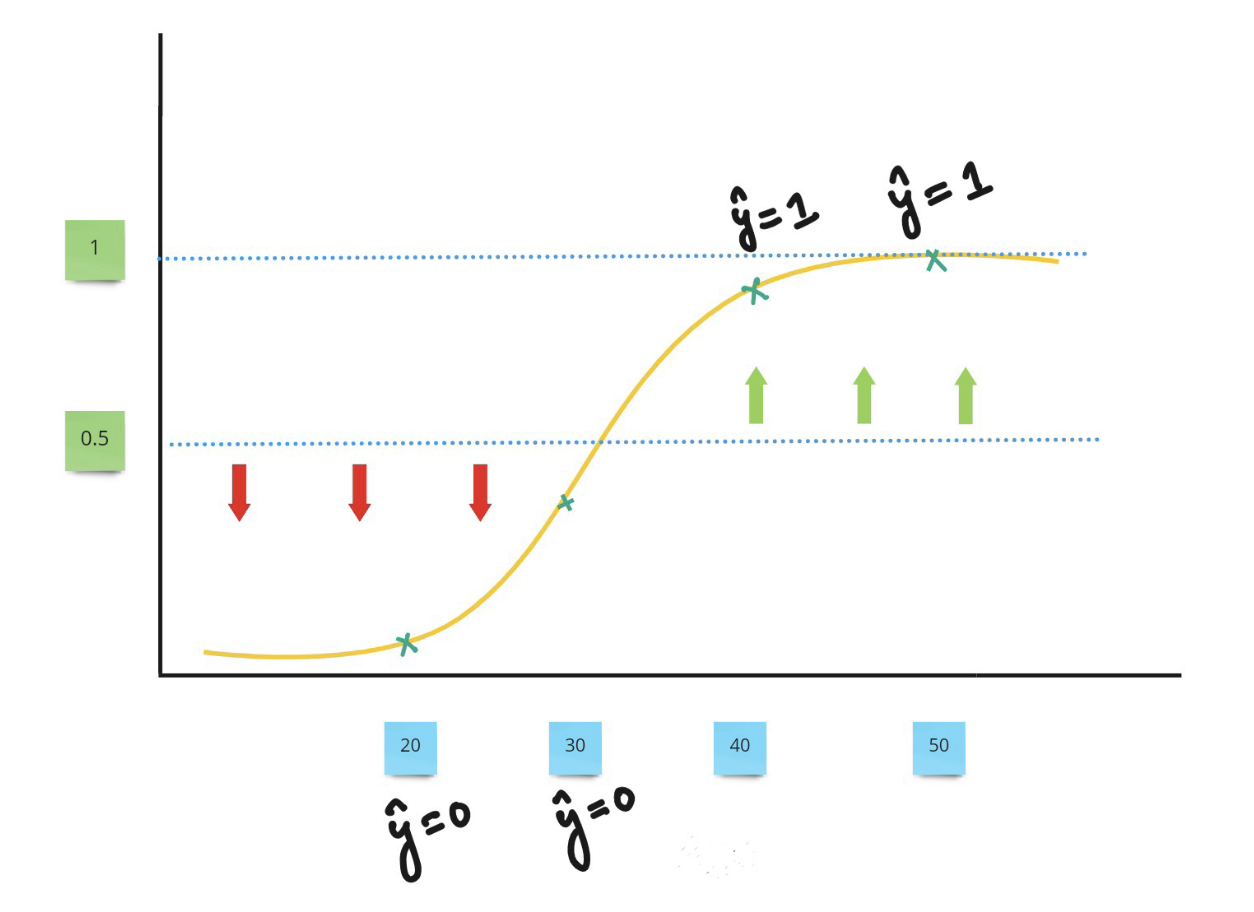

Also the threshold is not always 0.5, it can depend on the use case

###  **Code implementation of sigmoid function**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
def sigmoid(x):
    return 1/(1+np.e**-x)


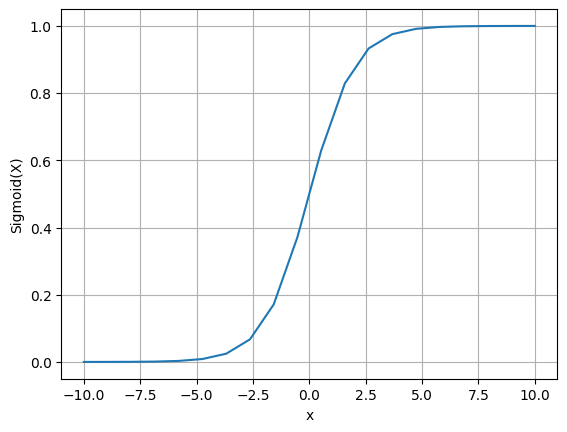

In [7]:
x = np.linspace(-10, 10, 20) # 20 equidistant points between -10 and 10
z = sigmoid(x)

plt.plot(x, z)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

- plot shows:
    - when σ() close to 0.5, the rate at which the sigmoid value increases and decreases  very fast
    - And as σ() go further away from 0.5 and towards 1 or 0, the rate at which the sigmoid value increases and decreases gets plateaued.


### Why is logistic regression the name if we are actually doing classification

The term "logistic regression" comes from this function
- At the base, it's doing regression only, because we are giving out a real value between 0-1 that we are treating as probabilities
- On top of Regression, we are applying logistic function, hence logistic regression

Now we have $y_i$ values as 0 or 1 but our predicted $\hat{y_i}$ which ranges between 0 and 1

**Quiz**
```
In logistic regression, the output of the sigmoid function is interpreted as:
a) Class probabilities
b) Raw scores
c) Error rates
d) Regression coefficients

Answer: Class probabilities

```

## **How to compare $y_i$ vs $\hat{y_i}$  ?**
We use Log-Loss as the loss function for Classification of data


> instructore note :
can use https://www.desmos.com/calculator to plot graph and check values

> **<font color='red'>INSTRUCTOR NOTES</font> refrence only**

log loss comes from a principle of maximum likelyhood estimation. Using probability and statistics we can derive this, but for now we'll just see why it makes sense to use this, how it works in our use case

### Log-Loss Intuition

Let's say we have to plot graph between error vs $\hat{y}$


What will be the error when $y_i = 1 ,  \hat{y_i}=1$ ?
- very low, near about 0

How about if $y_i = 1 ,  \hat{y_i}=0$ ?
- very high ( say infinity )

similarly if  $\hat{y_i}$ is 0.99 and $y_{i}=1 $ then
- error will be slightly greater than previous when  $\hat{y_i}$ was 1

similary if $\hat{y_i}$ is 0.01 and $y_{i}$  is 1
-  then error will be slighlty lesser than inf

So this is how graph looks like

which is nothing but the plot of equation $-log\hat{(y)}$

* We do not have to worry about the part of line below 1 because $y_i ̂$ can be avalue between 0 and 1 and so the loss will always be apositive value






<img src="https://drive.google.com/uc?id=1CVTSPiZGzAFQ3SLNDjQcZiY_v_WlBSyN">


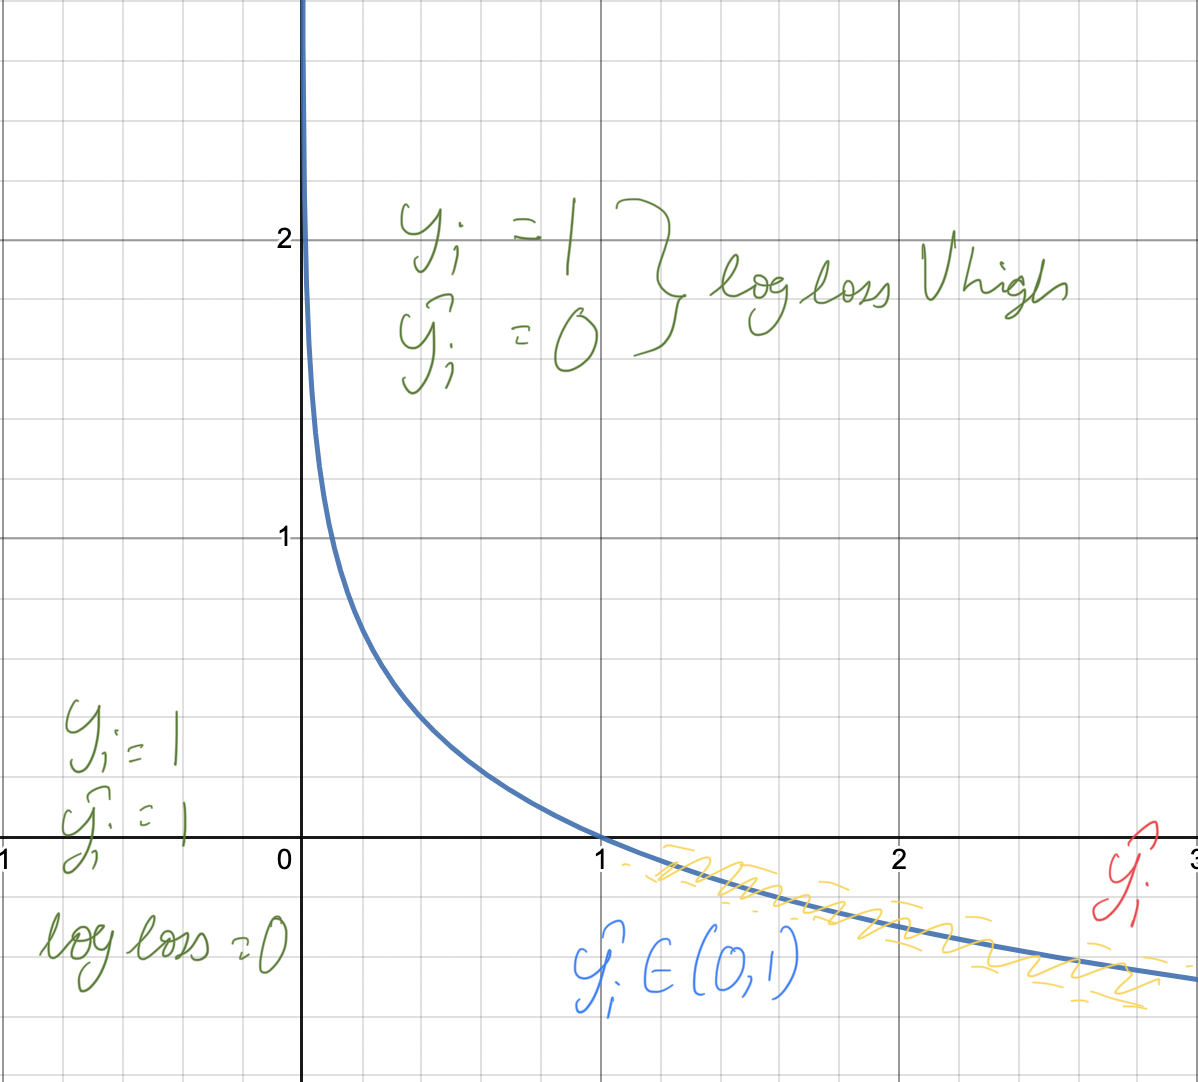

Now this was when $y_i$ was 1

**What about when $y_i$ = 0 ?**

Let's plot again error vs $\hat{y_i}$

if $\hat{y_i}=0$ and $y_i$  = 0 then
- error almost = 0

if $\hat{y_i}=1$ and $y_i$  = 0 then
- error = inf

similary if we draw like previously you will get this curve

and this curve is nothing but curve of equation $-log(1-\hat{y_i}$)






<img src="https://drive.google.com/uc?id=1-0Jq5HsEJh3CGbpw9loW_L3O8U5oduCM">


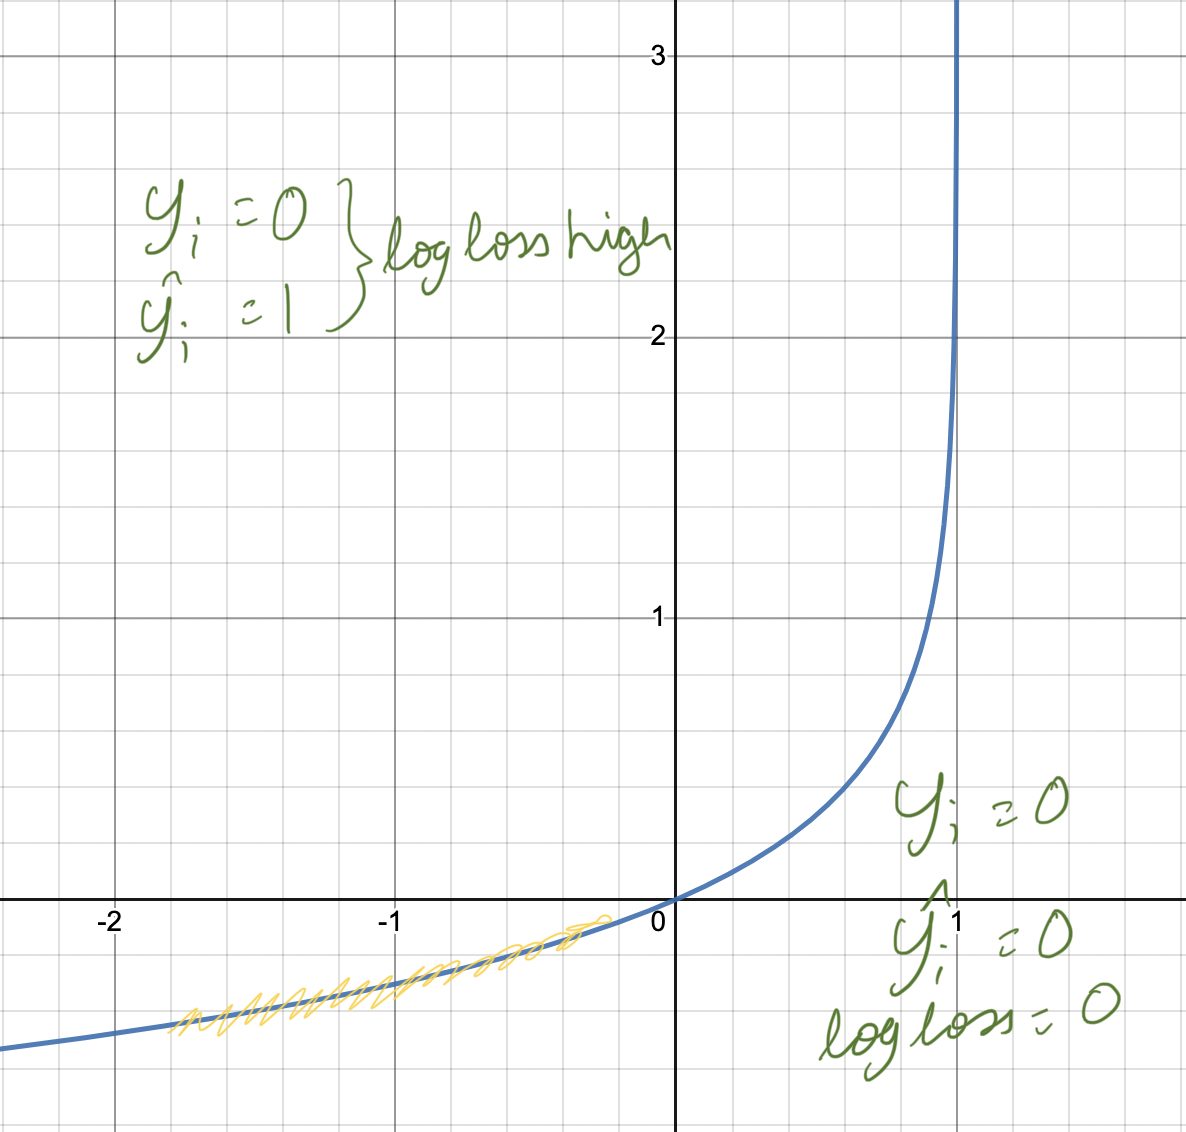

So mathematically we can define log-loss like this

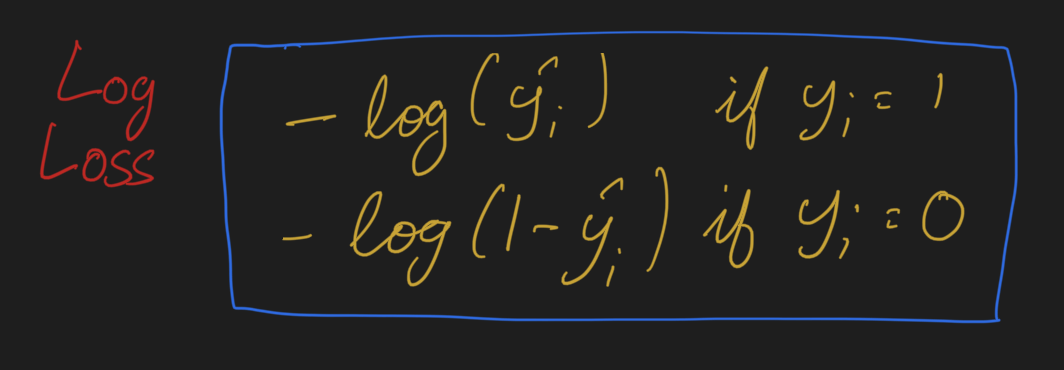

### How can we combine both cases in to one equation ?

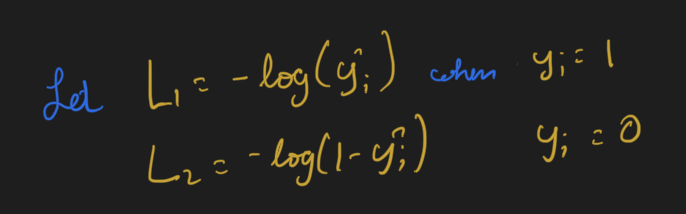

we use some clever maths to combine both the two log-losses
- Simply add them (one of the parts will be zero)

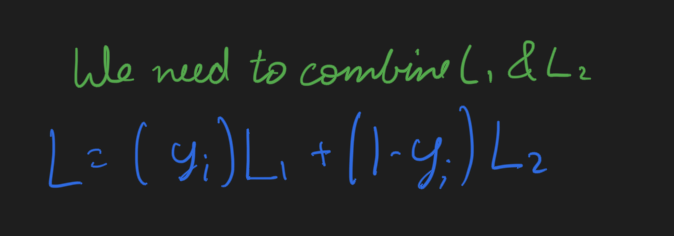

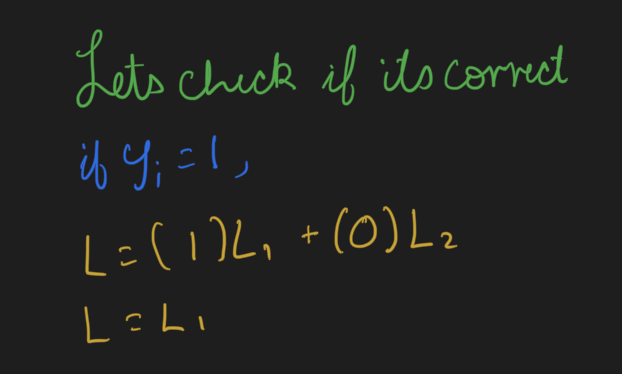

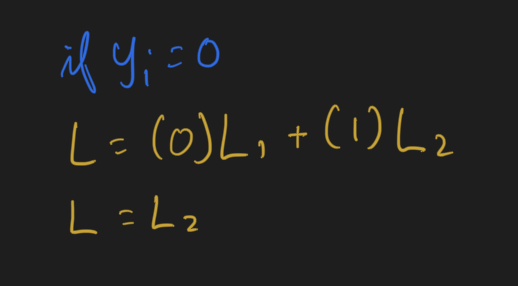

> <font color='red'>INSTRUCTOR NOTES</font> : **optional, just for refrence**

**Why dont we use mse**



<img src='https://drive.google.com/uc?id=18Tyn5B9Sn3TJlg_l4KTPKcx4mxS-3Uwd' width=800>


What function would you prefer when solving for optimization problem of logisitic regression ?


<img src='https://drive.google.com/uc?id=1DEU4hNh-xbdI_sT9LN3t2yg_Xe4FofIM' width=800>


**But, if we choose MSE with sigmoid, it'll be a non convex function.**
- and we may not reach optimal solution.



**But, we use MSE for linear regression. It was giving optimal solution. Why didn't we face this issue over there?**

Yes. Pay attention

- **MSE when used with sigmoid as predictor** turns out to be non convex.

We didn't use sigmoid as predictor in linear regression. Hence, it was convex over there

**Why MSE used with sigmoid is non convex?**

There's a mathematical proof behind it. If you are interested, you can read more here: https://towardsdatascience.com/why-not-mse-as-a-loss-function-for-logistic-regression-589816b5e03c

Hence, **we choose logloss with sigmoid**
- which is a convex function

and gurantees that we reach optimal solution.

### Let's implement log-loss now

Case1:
- When $y_i = 1$ and $y_î = 0.9$

In [8]:
import math

y = 1
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- Notice how loss is almost 0.1 which is close to 0.


Lets bring $y_î$ even closer to 1

Case2:
- When $y_i = 1$ and $y_î = 0.99$

In [9]:
y = 1
yhat = 0.99

print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- observe how just by incrementing $y_î$ by 0.09, there is a drastic decrease in loss

- Now lets see what happens when  $y_î$ gets closer to 0

Case3:
- When $y_i = 1$ and $y_î = 0.1$

In [10]:
y=1
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.3025850929940455


- Notice much high the log-loss is

Lets bring $y_î$ even closer to 0

Case4:
- When $y_i = 1$ and $y_î = 0.01$

In [11]:
y=1
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

4.605170185988091


- observe how just by a small variation in $y_î$, there is a drastic increase in loss


Now lets see what happens for the scenario when :  

Case5:
- When $y_i = 0 $ and $y_î = 0.1$


In [12]:
y=0
yhat=0.1
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.10536051565782628


- notice how there is a small loss for it which is identical to case 1

- now lets bring $y_î$ closer to 0

Case6:
- When $y_i = 0 $ and $y_î = 0.01$

In [13]:
y=0
yhat=0.01
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

0.01005033585350145


- notice how loss decreased similar to case 2


Case 7:
- When $y_i = 0 $ and $y_î = 0.9$

In [14]:
y=0
yhat=0.9
print(-y*math.log(yhat)-(1-y)*math.log(1-yhat))

2.302585092994046


- As expected now, the loss will be high

To summarize:
- The value of **log-loss is decreases** as our $y_î$ is geting closer to $y_i$

- and **log loss is increasing** as our $y_î$ is geting farther from $y_i$

this means that,
- we can use Optimization techniques, like gradient descent, to  log-loss function to get the optimal weights of the logistic regression model

**QUIZ**

```
Supposedly your y = 1 and ŷ = 0.8 , so what be the log-loss ?

A. log-loss will be a very high value

B. log-loss will be a very low value

C. log-loss will be 0
```
**Answer**

B. log-loss will be a very low value


# Optimization


- We only have seen, log-loss for ith sample of the data.

- We define our loss function for logistic regression as  summation of log-loss$_i$ for all the n samples of the data.
    - $L_{all} = ∑_{i=1}^{i=n} [-y log(y_î) - (1-y)log(1-y_î)] $
- And we can use gradient descent to optimize this equation

## **Regularisation**

- Similar to what we studied in regression, we can have regularizer here also
- We will optimize our weights $(w_j)$ here again using same regulaization parameter $\lambda$

Note: In code, we pass C as paramter which is inverse of $\lambda$

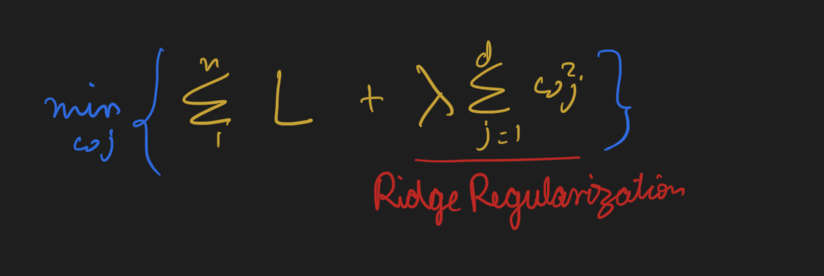

Question: if there is no non-linear feature, should we use Regularization when performing $min_{w_j}L$ ?

Ans: yes, to avoid overfitting of the model.

- hence we add an L-2 Regularization term to the loss function L

Now, gradient descent has to perform gradients on the equation:
- $min_{w_j}∑_{i=1}^n[ L +λ∑_jw_j^2]$


**QUIZ**

```
You are asked to Predict  Whether a person is Cancerous or not such that  You do not miss any cancer patient . What will be the threshold ?

1. If the predicted probability is more than 0.5 then a person is affected by cancer
2. If the predicted probability is more than 0.7 then a person is affected by cancer
3. If the predicted probability is more than 0.9 then a person is affected by cancer
4. If the predicted probability is more than 0.3 then a person is affected by cancer
```
**ANSWER**
4. If the predicted probability is more than 0.3 then a person is affected by cancer

## **Performance - Accuracy Metric**

We calculate accuracy by dividing the number of correct predictions by the total number of samples.

For example given this data where
- input is  x i.e 20 and
- y as  correct label
- $\hat{y}$ as predicted output
- y-pred be the predicted probabilty (output before applying sigmoid function)


Now if you observe we have entries where y and $\hat{y}$ are not same
-  these are called misclassification cases
- for example where x= 60 in this dataset

Now suppose we have 100 data point and 10 of them are misclassified

**How many are accurate ?**
- 90

**What will be accuracy?**
-  90/100
- which will be  correct predictions/ total predictions
- We calculate accuracy by dividing the number of correct predictions by the total number of samples.



<img src="https://drive.google.com/uc?id=1JHMh9hfqG59GqqjDNLatDINJj0egZYsf">

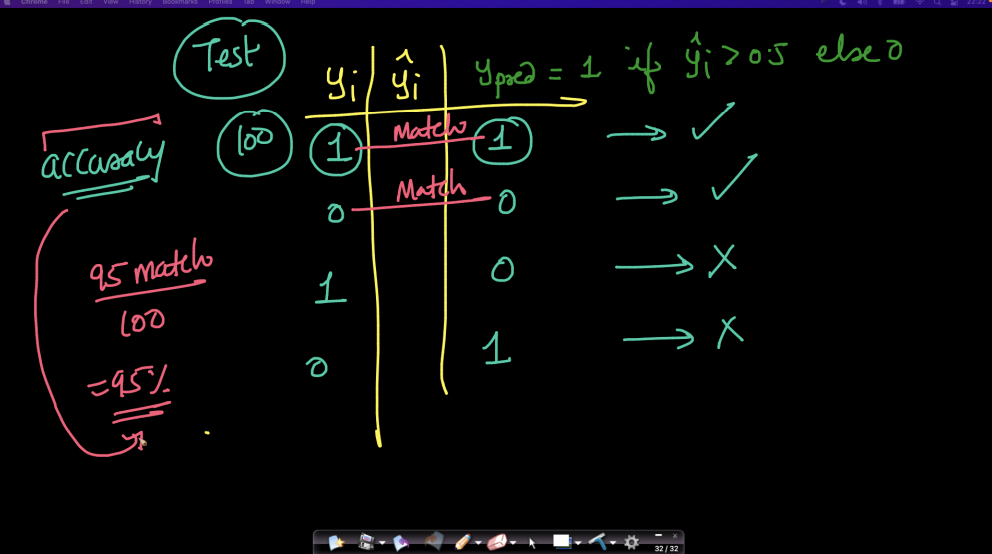

 **Quiz**
```
Supposedly, You have 1500 samples, which has 750 samples for class-1 and class-2.
The Logsitic model predicts correct 450 samples for class-1 and correct 350 samples for class-2,
what is the accuracy of the model ?

1. 0.53
2. 1.06
3. 0.60
4. 0.46
```
**Answer:**
1. 0.53

**Explanation**

Accuracy = $\frac{(450+350)}{1500} = 0.53$

## Scikit Learn Implementation of Logistic Regression

In [15]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

Downloading the file

In [16]:
## Run the below line to install a lower version if gdown throws any error
#pip install gdown==4.6.0

#OR

#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m' -O churn_logistic.csv

In [17]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 73.2MB/s]


In [18]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ Calls  Intl Plan  VMail Plan  Day Calls  ...  Eve Calls  \
0               1          0           1        110  ...         99   
1               1          0           1        123  ...        103   
2               0          0           0        114  ...        110   
3               2          1           0         71  ...         88   
4               3          1           0        113  ...        122   

   Eve Charge  Night Calls  Night Charge  Intl Calls  Intl Charge  State  \
0       16.78           91         11.01           3         2.70     KS   
1       16.62          103         11.45           3         3.70     OH   
2       10.30          104          7.32           5         3.29     NJ   
3        5.26           89          8.86           7         1.78     OH   
4       12.61          121          8.41           3         2.73     OK   

  Area Code     Phone Churn  
0       415  382-4657     0  
1       415  371-7191     0  
2       415  358-1921     0  
3       408  375-9999     0  
4       415  330-6626     0  

[5 rows x 21 columns]

Lets see how many samples does churn data has

In [19]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

- Notice we have 5700 samples which are quite enough for training the  logisitic Regression model.

Now, lets focus on ```Churn``` column which is our Y  

In [20]:
churn["Churn"].value_counts()

Churn
0    2850
1    2850
Name: count, dtype: int64

- We see how the data is balanced since we have equal number of samples in both the customers who churned or did not churned

Now lets see how each feature is effective in predicting Churn or Not by performing a univariate EDA

- But since we have already studied EDA, we will do a quick  code walktrhough of it

<Axes: xlabel='Churn', ylabel='Day Mins'>

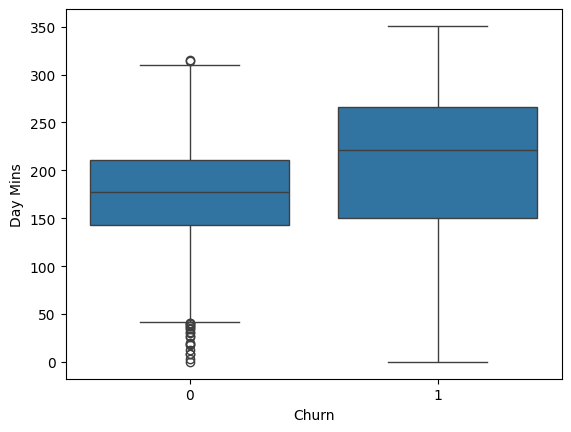

In [21]:
import seaborn as sns
sns.boxplot(x='Churn', y='Day Mins', data = churn)

- Notice how we use feature ```Day Mins``` to check if it is significant or not

#### What can we see from the boxplot ?
- The churned custmors have a higher median for  Day Mins than not churned customers which means:
- Customer who spent more time calling in a day tend to churn

this shows, ```Days Mins``` is an important feature



Now, let's see if there is any other feature which has collinearity with ```Days Mins```

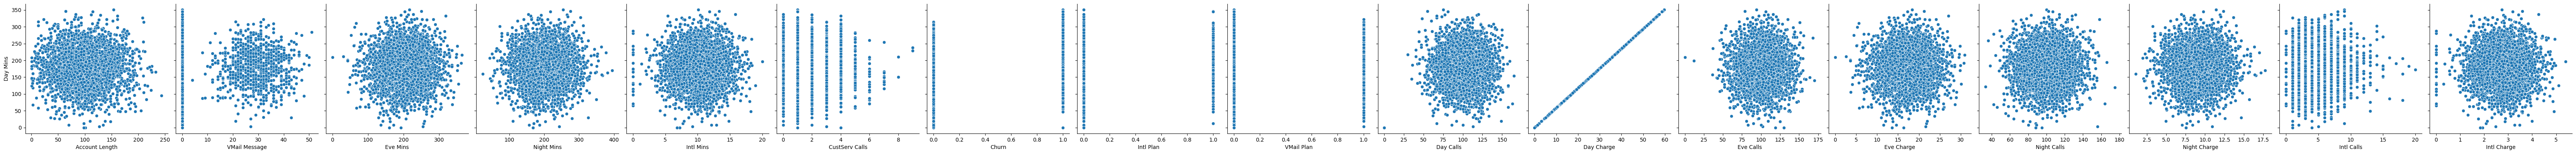

In [22]:

sns.pairplot(data=churn, y_vars=["Day Mins"], x_vars=['Account Length', 'VMail Message' , 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls',
       'Night Charge', 'Intl Calls', 'Intl Charge'], height=4, aspect=1)
plt.show()

#### Can we say which feature is highly correlated with ```Days Mins``` ?
- Day Charge is highly correlated
- meaning as Day Mins so does the  Day Charge
- Hence we will just drop either one of them

- notice how we are still doing the same exact things as we did in Linear Regression.
- Since we are still training a linear model if we recall log-odds

Now lets see another feature ``` Account Length```

<Axes: xlabel='Churn', ylabel='Account Length'>

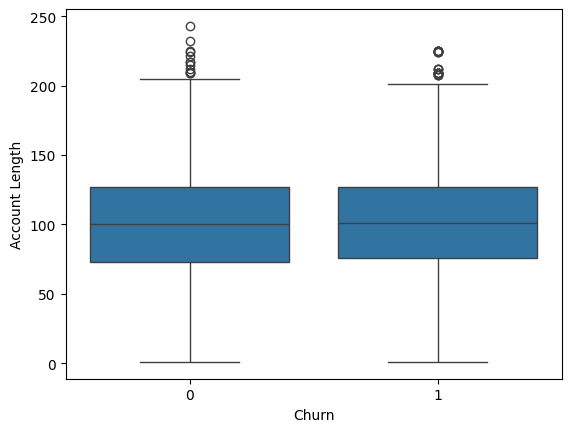

In [23]:
sns.boxplot(x = 'Churn', y= 'Account Length', data = churn)

#### Does the Account Length feature relevant ?
- If we see median for both, its quite similar
- Hence this feature does not have any signficance and can be dropped




We are skipping the rest of the EDA but Students should take it as an exercise and perform more EDA to find out which features has some relation with target variable

#### What all EDA can do ?
- Remove useless Features
- Remove highly Correlated Features


We are now taking a few of the Features which might not be the best ones to choose for this problem statement.

In [24]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

#### Train test Split

- Splitting the data into training and testing as done in Linear Regression

#### But what should be the ratios for splitting ?
- 80% is training data and 20% is test

- We know the importance of Validation data, hence we split the 80% data as 60% and 20%, where
- 60% is Training data and 20 % is cross Validation data  

In [25]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(3420, 5)

Now, lets do column standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [27]:
# print X_train
X_train

array([[-1.3401872 , -2.29116555, -0.52179332,  2.19011647, -0.5352414 ],
       [-0.37273287, -1.19169576, -1.15081453, -0.45659672, -0.5352414 ],
       [ 1.54289097,  0.33984637, -0.52179332, -0.45659672, -0.5352414 ],
       ...,
       [ 0.83417443,  0.52694913, -1.15081453, -0.45659672, -0.5352414 ],
       [-0.58807985, -0.12887496,  1.3652703 , -0.45659672, -0.5352414 ],
       [-0.45469329,  1.42195611,  0.73624909,  2.19011647,  1.68255781]])

> **instuctor note: go through this link and explain the parameters from sklearn api**

 [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) using scikit Learn

- If we see L2 regularization is done by default
- We see there is no Regularization Parameter λ

#### How to vary Regularization Parameter λ ?
- There is a C parameter which is Inverse of λ

There are other parameters which we will learn in later lectures but as for now we will be focusing only on these parameters.

Lets start with implementation of Logistic Regression


<font color='red'> Instructor Note </font>

When implementing ```ElasticNet``` Regularization,
- Sklearn has 11_ratio hyperparameter which has a range $0 ≤ $ l1_ratio $ ≤ 1$

Setting l1_ratio=0 is
- equivalent to using penalty='l2'

while setting l1_ratio=1 is
- equivalent to using penalty='l1'.

For 0 < l1_ratio <1,
- the penalty is a combination of L1 and L2.

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

Now, let's see the weights of each feature except $w_0$
- Since $w_0 $ is also called Intercept of the model





In [29]:
model.coef_

array([[ 0.78674301,  0.31084942,  0.94070165,  0.86919545, -0.31809071]])

- observe how the weight of feature 3  i.e ```CustServ Calls``` (CustomerService Call) is highest

#### What can we say about ```CustServ Calls``` ?
- Since we have already Standardize the data, the weight for this feature is a large positive value
- that means customers having more "CustServ Calls" will probably churn more

Next highest weight is for Feature 4 ```Intl Plan``` which is International Plan
#### What can we say about it ?
- Meaning if a Customer does a lot of International Plans, the customer will churn,

Showing that there is issue regarding the International plans of the company

We also have an intercept weight

In [30]:
model.intercept_

array([0.05297365])

In [31]:
y_pred=model.predict(X_val)
print(y_pred)

[0 0 1 ... 0 0 0]


we can get the classes for each input with the predict function

### predic_proba function from sklearn

The predict_proba() method
In the context of classification tasks, some sklearn estimators also implement the predict_proba method that returns the class probabilities for each data point.

The method accepts a single argument that corresponds to the data over which the probabilities will be computed and returns an array of lists containing the class probabilities for the input data points.

Probability estimates.
The returned estimates for all classes are ordered by the label of classes.

In [32]:
y_pred_prob=model.predict_proba(X_val)
print(y_pred_prob)

[[0.70985217 0.29014783]
 [0.8681417  0.1318583 ]
 [0.45621812 0.54378188]
 ...
 [0.95273524 0.04726476]
 [0.60128439 0.39871561]
 [0.81202669 0.18797331]]


What we see here is the probability of each data point being in a class
- also we can see the probabilities add to 1

Checking acuracy score in train and  validation data

In [33]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' )

Train Accuracy:0.7564327485380117, Val Accuracy:0.7578947368421053


**Observe**

How train and validation Accuracy of the logistic Model are quite low,


Hence let's start doing hyper parameter tuning on parameter $C = \frac{1}{\lambda}$  to increase the performance of the model

### sklearn pipeline
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b

Pipeline is a powerful tool to standardise your operations and chain then in a sequence, make unions and finetune parameters.
pipeline class allows sticking multiple processes into a single scikit-learn estimator.

pipeline class has fit, predict and score method just like any other estimator (ex. LinearRegression).

In [34]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

The code is similar to the code explained in Linear Regression


- First we initialize the values for $λ$
- then for each value of $λ$
    - Then create a pipeline for standarization scaling and Logistic Regression model
    - Then fit the train data to the model
    - And get the scores of the train and validation data set
    

NOTE: the default scoring metric is Accuracy





In [35]:
len(val_scores)

120

Now, let's plot the graph and pick the Regularization Parameter $λ$ which gives the best validation score

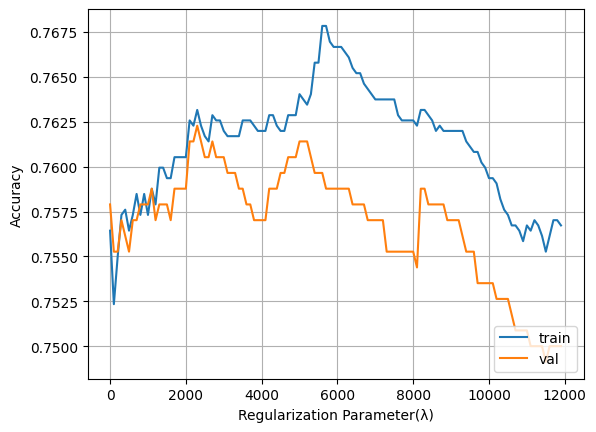

In [36]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()



- We see how Validation increases to a peak and then decreases



- Notice as Regularization is increasing, the Accuracy is keep on decreasing since model is moving towards Underfit



<font color='red'> Instructor Note </font>

Increase the  Regularization further to 50000
- by replacing the 12000 hyperparameter range to 50000
- and run the simulation again


#### **QUIZ 1**

```
when using λ = [1,0.1,0.01],
we got train and test accuracy as [0.90, 0.98, 0.93], [0.78,0.99,0.97]
What is the best λ ?

1. 1
2. 0.1
3. 0.01
```

**Answer**

2. 0.1

**Explanation**

the test accuracy is max when using 0.1 as λ
- also the difference between the train and test accuracy is very low
- showing the model did not overfit or underfit


#### What can we see from the increased value of Regularization Parameter?

- We see how the model starts underfitting and performing poorly on the train and validation data

- Now we pick that $λ$ we are getting the maximum validation score

In [37]:
np.argmax(val_scores)

np.int64(23)

In [38]:
val_scores[23]

0.762280701754386

- We observe that validation score is maximum of 76.2% when index = 23, thus our $λ$ best becomes:

In [39]:
l_best = 0.01 * 23 * 100

- We do this since we are stepping 100 in each iteration

Lets train model with best λ

In [40]:
scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/l_best))
scaled_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.043478260869565216))])

Now test this best model on our test data

In [41]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.7657894736842106


NOTE: The scaler in the pipepline performs scaling first and then the logistic Regression,
- the scaler uses training data mean and standard deviation when model is in training
- And continues using it for Validation and Test data since we are not using ```.fit()``` function instead just a ```.score()``` function

## Impact of outliers


<img src='https://drive.google.com/uc?id=1aQk_WFojHob2thbycSBBC1hXx2cIL2Lh' width=800>



### Case I: When the outlier lies on the correct side

Now, $\hat{y}=σ(z^i)$


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/036/753/original/image_2023-06-14_052158593.png?1686700322" height=500 width=600>


<img src='https://drive.google.com/uc?id=1iDeFLogS9rCNs1WiELMsFoRMIx_jRHZ8' width=800>



Since the Loss is very less in this case:

=> The impact of outlier is **very less**

### Case II: When the outlier is on the opposite/wrong side


<img src='https://drive.google.com/uc?id=1SKv32h8SUGk4pbOuS6XQnCv20LMnUV6V' width=800>


Let's say $z^i=-4.3$

So $\hat{y}$ becomes 0.01

Therefore, L = $-log_e(0.01)$

This comes out almost equal to 4.6, which is a very large value

=> The impact of outlier will be **very high**

Thus the best thing is to find the outlier and remove them, so that we get accurate results

#### **Quiz 2** (Check your understanding)

```
How do outliers affect the classification boundaries in logistic regression?
a) Outliers shift the classification boundaries closer to the outlier values
b) Outliers have no effect on the classification boundaries
c) Outliers widen the gap between the classification boundaries
d) Outliers make the classification boundaries more sensitive to minor changes

Answer: a) Outliers shift the classification boundaries closer to the outlier values
```

## Multi-class classification

Till now we have seen how to use logistic regression to classify between two classes

But in real world there will be cases with many more classes

#### How can we use logistic regression in cases with more than two output classes?


<img src='https://drive.google.com/uc?id=1ZXmXc62oRRLsGOxNVvHi4GWITISWvL16' width=800>




<img src='https://drive.google.com/uc?id=1MSTuz_D9AJUZlHgDqMwQsBsyTLAE2gE7' width=800>



To train these models, we can't use the same dataset, since our data will have three classes.

So we will modify our data for the three models.

Say for model 1, to check whether the input is orange or not,
- Our output column will be modified by replacing the values with orange as 1, and rest values with 0

We will do the same for the other two models


<img src='https://drive.google.com/uc?id=1xCJJoF5j0HJILD0xfhI6hA_1RqwoefHz' width=800>




<img src='https://drive.google.com/uc?id=15kHWLomnIvIkr6EmzB1EiDpAddlOQ-q2' width=800>



#### **Quiz 3** (Check your understanding)

```
We want to classify cars based on the 20 different brands of cars.
How many logisitic Regression model will we need ?

a. 10
b. 20
c. 21
d. 19


b. 20

**Explanation**

if we have yi = {1,2,3...K} in the  dataset, we have to generate K-binary classifier models.
```

#### Now given an input point, how to predict which class it belongs to?



<img src='https://drive.google.com/uc?id=1RTcgUwMq12FlqHJBH3l0jl91mbfCMQxv' width=800>



#### **Quiz 4** (Check your understanding)

```
For three models, the yhat values come to be:
M1=0.34
M2=0.28
M3=0.35

What would be the predicted output class by the classifier?

a. M1
b. M2
c. M3
d. None since no model has yhat>0.5

Ans: c.M3

Explanation: The model with the highest yhat value will be chosen irrespective of whether they are greater than the threshold or not
```

**Quiz** (Check your understanding)

```
What is the purpose of the one-vs-rest (OvR) strategy in multi-class logistic regression?
a) To improve the interpretability of the model coefficients
b) To handle imbalanced datasets in multi-class problems
c) To reduce the complexity of the model
d) To transform a multi-class problem into multiple binary classification problems
Answer: d)To transform a multi-class problem into multiple binary classification problems

Explanation:
The one-vs-rest (OvR) strategy is used in multi-class logistic regression to transform the multi-class problem into multiple binary classification problems.
We build n models for n classes where in each model we treat each class as the positive class and the rest of the classes as the negative class.

```

To implement One vs Rest method using the Sklearn library there's a parameter through which it can automatically work for more than 2 classes.

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/283/original/Screenshot_2024-01-10_at_6.00.13_PM.png?1704889962)

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/284/original/Screenshot_2024-01-10_at_6.03.25_PM.png?1704890017)

**<font color='red'> Instructor Note </font>**
- Convey to learners that for implementation of it they can refer to the post read material shared.

## Log odds interpretation of logistic regression


<img src='https://drive.google.com/uc?id=1z-0qkx0h81U_iwb7fVeFQG0RVkpqyPGy' width=800>





<img src='https://drive.google.com/uc?id=1mruiW2aBWCEMjW74WtAC3_AQoeDZ4EdJ' width=800>



#### Which concept of earlier is this similar to?

Remember, $σ(p)$ also defined probability.

So if we simplify our winning/losing as belonging to class 1/0, then $σ(p)$ here defines the probability of belonging to class 1 (winning class)

#### **Quiz 5** (What do you think?)

```
The logistic regression model predicts:
a) Probabilities
b) Class labels
c) Continuous values
d) Ordinal values

Ans: a) Probabilities

Explanation:
Logistic regression predicts the probabilities of the target variable belonging to the positive class
```


<img src='https://drive.google.com/uc?id=1Xpm2xAc1oT95bAzZvRQPUobikSRR2Fgs' width=800>



<img src='https://drive.google.com/uc?id=1XWM57akV5CFtG8JypxDELnpNokU6nLco' width=800>

#### What does this mean geometrically?



<img src='https://drive.google.com/uc?id=17CVyUuT9ZLlsqgWhsyKUChPP0o6Nlw33' width=800>

#### **Quiz 6** (Check your understanding)

```
If log(odds) is negative, which of the options hold true?

a. 1-p > p
b. p > 1-p
c. p == 1-p

Ans: a. 1-p > p

Explanation: since odds = p/1-p, negative log value would mean p/1-p is <1, which would mean 1-p>p
```


<img src='https://drive.google.com/uc?id=1F7pWJ-_hmPbEe7LgaJhC9VESNrx0Y24x
' width=800>

To find the probability of the point lying, we simply apply exponential to both sides and solve for p, which would give:

$p=\frac{1}{1+e^{-z}}$

Note: Sigmoid and Logit and just inverse of each other, and both can be used to build a logistic regression model

---
## Problem Statement
---

- You know both type of problems classification and regression. Also you have learnt some Machine Learning Algorithms.
- Your colleague has introduced you with a platform called **Kaggle** where diffirent **Data Science competitions** are held. You decided to participate in one of the beginner level competition to get real-world exposure.

  <center><img src="https://drive.google.com/uc?id=1IS7zA_v-8F1P5hxZs4eX7xDiAi7ccWeq" width="600" height="350"> </center>


- While going through competitions rules you noticed a evaluation section.There’s a metric on which they judge your performance. You got confused because of metric given there was not understood by you.


#### Business Objective
- In order to understand all Performance metrics for classification, you will cover them in this lecture.






---
## Classification Metrics
---

- You are working on Email spam detection model

  - not spam will be -ve class (class 0)
  - spam will be +ve class (class 1)

- Usually, the count of **spam emails** is considerably **very low** (~ 10%) than **relevant (not spam) emails** (~ 90%)

- Now, we built the model and it is giving 90% accuracy on unseen data.




#### Question: Is this a good model?

No. The model is as good as dumb model.

Consider a model
- which only predicts every email as not spam
- the accuracy for this model will be 90% which sounds good.




---
## **Confusion Matrix**
---



#### What if we had something that could give us a granular view of prediction?

For each class, we may want to know
 - how many datapoints are being correctly predicted
 - and how many wrongly predicted and to which class

**Confusion matrix** does exactly that.

### Cells of Confusion Matrix in detail
  <center><img src="https://drive.google.com/uc?id=13UH_FUQMB2kskO6vAXPaNAd4Npe-MApX" width="800" height="300"> </center>


Assume that the task at hand is binary classification i.e. two class labels (0,1)

We make a $2 × 2$ grid such that:

The matrix is divided in 4 quadrants

Lets look at the cells with correct classifications first

- **True Positive (TP)**:
    - Number of Datapoints that were actually  positive (1) and predicted as positive (1).
    - For example:  You **predicted a mail is a spam and it actually is**.

- **True Negative (TN)**:
    - Datapoints that were actually negative (0) and predicted as  negative (0).
    - For example: You **predicted a mail is not spam and it actually is not**.

Notice, **correct classifications lie on the diagonal**

Lets look at the cells with wrong classifications

- **False Negative (FN)**:
    - Number of Datapoints that were actually positive (1) but predicted as negative (0)
    - or a point which is actually positive but falsly classified as negative
    - For example: You **predicted a mail is not spam and it actually is**.
    - Also called **Type 2 Error**


- **False Positive (FP)**:
    - Datapoints that were actually negative (0) but predicted as postive class (1)
    - or a point which is actually negative but falsly classified as positive.
    - You **predicted a mail is not spam and it actually is**.
    - also called as **Type 1 Error**

## **How will the confusion matrix for dumb model look for spam classification?**

Assume

1. 400 datapoints in test set
2. **90% data is non-spam ==> 360 non-spam, 40 spam**
3. Dumb Model - predicts all 400 emails as non-spam (-ve, 0)




  <center><img src="https://drive.google.com/uc?id=1pt8AtJsaGSBG3ZkhZxjF6S9Nh1A5nrUQ" width="500" height="400"> </center>


Lets do correct classification first

#### What will be True Positive?

0, since everything is predicted as negative class

#### What will be True Negative?

All 360 non-spam will be predicted as non-spam ==> 360
Lets now look into incorrect classification

#### What will be False Positive?

- We need to look for non-spam emails which were predicted as spam
- But since all the emails are predicted as non-spam ==> 0

#### What will be False Negative?

- We need to look for spam emails which were predicted as non-spam
- We have 40 spam emails in the test, all predicted as non-spam ==> 40

#### Question: Can you now tell if our model with 90% accuracy actually a good model?

1. Both TP and TN should be high
2. Both FP and FN should be low

All spams(+ve) are being predicted as non-spam (-ve)

- High TN, but TP is "very low"
- Low FP, but high FN

Hence, we can conclude the spam detection model we have build is not actually good model.

#### Question: Given CM, how would you calculate actual positive (or actual negatives)?
- TP + FN = P (total actual positives) $⇒ 0 + 40 = 40$
- FP + TN = N (total actual negatives) $⇒ 0 + 360 = 360$


Lets work on the second question





## **How will confusion matrix for "ideal" model look for spam classification model?**

- Ideal Model ==> No incorrect classification
- That means, FP=0 and FN=0

#### What will be TP?

Same as actual number of spams ==> 40

#### What will be TN?

Same as actual number of non-spams ==> 360


  <center><img src="https://drive.google.com/uc?id=1ZAMkWzOxZ2XXFfkmtKsILQ_4aJ290PtA" width="500" height="400"> </center>



####**QUIZ 7**

```
For Ideal Model, which of the following is true?

1. FP and FN are very low, while TP and TN are very high
2. TP and FN are very low, while FP and TN are very high
3. TN and TP are very low, while FP and FN are very high
4. FP and TN are very low, while TP and FN are very high

```

**ANSWER**

1. FP and FN are very low, while TP and TN are very high

### **How do we calculate Confusion Matrix (CM)?**

If you had to calculate it by hand

#### Question: What all data would you require?

Actual target (y), and predicted target (y_hat)

Lets create CM for a "random" model - random predictions

In [42]:
import pandas as pd
import numpy as np


#### Lets load a dummy Spam/No-Spam data

with imbalanced ratio of 100:1 (not spam: spam)

In [43]:
## Run the below line to install a lower version if gdown throws any error
#pip install gdown==4.6.0

#OR

#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_jZRFvpjElFBGyOO-_4Cv68-n2cDbNUn' -O pred_data.csv

In [44]:
!gdown 1_jZRFvpjElFBGyOO-_4Cv68-n2cDbNUn

Downloading...
From: https://drive.google.com/uc?id=1_jZRFvpjElFBGyOO-_4Cv68-n2cDbNUn
To: /content/pred_data.csv
100% 247k/247k [00:00<00:00, 92.2MB/s]


In [45]:
data = pd.read_csv('pred_data.csv')

data.head()

y     proba
0  0.0  0.281035
1  0.0  0.465152
2  0.0  0.352793
3  0.0  0.157818
4  0.0  0.276648

**observe**

The file contains $y$ and $ŷ$ values for Spam/ Not Spam data

Lets see the imbalance data

In [46]:
data['y'].value_counts()

y
0.0    10000
1.0      100
Name: count, dtype: int64

We can see how No Spam samples are 100 times more than Spam samples showing data is imbalanced

#### Lets generate y_pred by keeping threshold as 0.5

In [47]:
data['y_pred'] = data['proba'].apply(lambda y_score: 0.0 if y_score < 0.5 else 1.0)

#### Lets use sklearn `confusion_matrix` function to get the values

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(data.y, data.y_pred)
conf_matrix # 2D np array

array([[9761,  239],
       [  45,   55]])

#### How do we know which one is what?

Lets check the sklearn [documentation ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

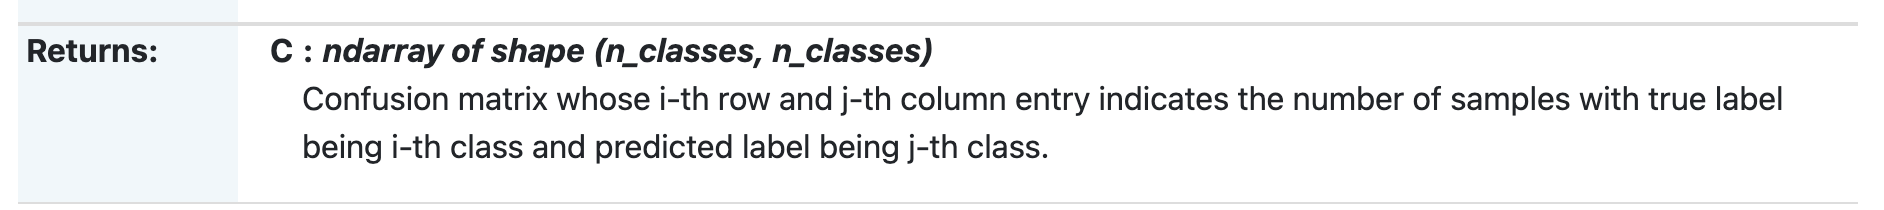

But the `ConfusionMatrixDisplay` plotting functionality in sklearn makes this easy

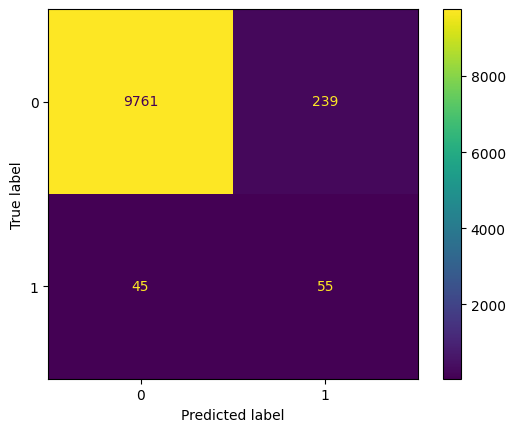

In [49]:
ConfusionMatrixDisplay(conf_matrix).plot()



#### Question: There are 239 predictions in top right quadrant. Is it FP or FN ?
Ans: FP



####**QUIZ 8**

```
For a model to have low accuracy, which of the following is true?

1. FP and FN are very low, while TP and TN are very high
2. TP and FN are very low, while FP and TN are very high
3. TN and TP are very low, while FP and FN are very high
4. FP and TN are very low, while TP and FN are very high

```

**ANSWER**

3. TN and TP are very low, while FP and FN are very high

## **Why Accuracy is not a good metric always ?**

Let's say we have two models M1 and M2 which look like this

- where y and $\hat{y}$ are given
- Supposedly we consider 0.5 as threshold
- $y_{pred} = 1 $ if $y_î > 0.5$ else 0

What will be the accuracy of both models ?

- M1 -> 100%
- M2 -> 100% again

**But if we were to compare both models which one is best ?**

- Accuracy is not helping here
- Accuracy is 100 for both so we can not tell which model is best





<img src="https://drive.google.com/uc?id=1YbvrL3P9koa8HZYkstlfX72T0YmOWFqS">

**Q. what will be right metric to compare two models ?**

- Log loss